<a href="https://colab.research.google.com/github/MargaritaKotova/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence-course/blob/master/CNN_for_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install "tensorflow>=2.0.0"
 import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 421.8MB 35kB/s 
     |████████████████████████████████| 450kB 43.6MB/s 
     |████████████████████████████████| 3.9MB 49.1MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
2.1.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
#Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [5]:
K = len(set(y_train))
print("number of classes: ", K)


number of classes:  10


In [0]:
#Build the model
i = Input(shape = x_train[0].shape) #(32, 32, 3)
x = Conv2D(32,(3,3), strides=2, activation='relu')(i)
x = Conv2D(64,(3,3), strides=2, activation='relu')(x)
x = Conv2D(128,(3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)


In [8]:
#Compile and fit
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 48s 954us/sample - loss: 1.5708 - accuracy: 0.4247 - val_loss: 1.3293 - val_accuracy: 0.5212
Epoch 2/15
50000/50000 [==============================] - 47s 942us/sample - loss: 1.2878 - accuracy: 0.5345 - val_loss: 1.2184 - val_accuracy: 0.5594
Epoch 3/15
50000/50000 [==============================] - 47s 943us/sample - loss: 1.1538 - accuracy: 0.5867 - val_loss: 1.0654 - val_accuracy: 0.6189
Epoch 4/15
50000/50000 [==============================] - 47s 946us/sample - loss: 1.0659 - accuracy: 0.6201 - val_loss: 0.9969 - val_accuracy: 0.6486
Epoch 5/15
50000/50000 [==============================] - 47s 943us/sample - loss: 0.9809 - accuracy: 0.6514 - val_loss: 0.9341 - val_accuracy: 0.6725
Epoch 6/15
50000/50000 [==============================] - 47s 943us/sample - loss: 0.9298 - accuracy: 0.6685 - val_loss: 0.9186 - val_accuracy: 0.6814
Epoch 7/15
50000/50000 [====================

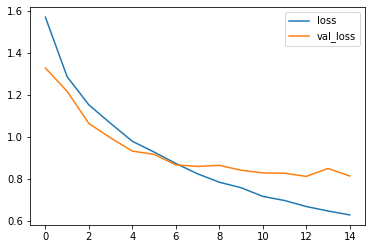

In [9]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

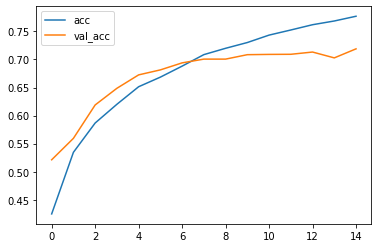

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix without  normalization
[[742   8  59  15  15  10  12   9 112  18]
 [ 21 783   7  14   3   2  12   5  53 100]
 [ 62   2 628  65  96  43  54  29  15   6]
 [ 14   4  79 550  82 132  69  41  19  10]
 [ 25   2  63  60 691  28  48  66  15   2]
 [ 13   1  75 229  48 547  22  51  10   4]
 [  4   6  34  68  43  18 812   7   7   1]
 [ 10   0  44  36  55  42   7 796   4   6]
 [ 36  11  19  11   6   6   7   4 887  13]
 [ 49  59  16  22  11   9  12  17  52 753]]


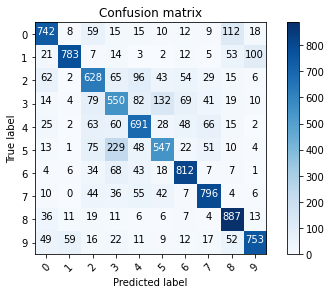

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap = plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without  normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color = "white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
labels = '''airplane
automobile
bird 
cat
deer
dog 
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: dog Predicted: horse')

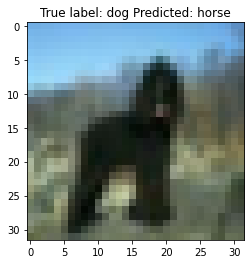

In [13]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))